In [1]:
%load_ext autoreload
%autoreload 0
from useful_functions import *
from emceeHammer import *
import ast
from varname import nameof
savePNG = True ## Changes matplotlib backend to save plots as pgf (default:True)
if savePNG:
    mpl.use("agg")
    plotExt = str('.png')
elif not savePNG:
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,})
    plotExt = str('.pgf')

notebookPlotFlag = True ## Changes Jupyter plotting backend (default:True)
if notebookPlotFlag:
    %matplotlib notebook
elif not notebookPlotFlag:
    %matplotlib inline
np.random.seed(1006)

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [2]:
tess_2020bpi = pd.read_csv('JhaData/TESS_SN2020bpi.csv')[::2].reset_index(drop=True)
#tess_2020bpi['mjd_0'] = tess_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
fluxNorm = 0.4*np.max(tess_2020bpi['flux'])
#print(fluxNorm)
#tess_2020bpi.head()

In [3]:
def normLC(lcDF):
    normFrame = lcDF.copy()
    normFrame['mjd_0'] = normFrame['mjd'] - tess_2020bpi['mjd'].min()
    normFrame.flux = lcDF.flux/fluxNorm
    normFrame.e_flux = lcDF.e_flux/fluxNorm
    normFrame.raw_flux = lcDF.raw_flux/fluxNorm
    normFrame.e_raw_flux = lcDF.e_raw_flux/fluxNorm
    return normFrame

In [7]:
tess_2020bpi_norm = normLC(tess_2020bpi)
print(tess_2020bpi_norm[tess_2020bpi_norm.mjd_0 < 17].max())
tess_2020bpi_norm.head()

BTJD               1887.443200
mjd               58886.943200
cts               12779.319600
e_cts              1457.983000
bkg_model          4800.772200
raw_flux              1.351994
e_raw_flux            0.154248
bkg_model_flux        0.027572
flux                  1.576696
e_flux                0.147164
mjd_0                16.999120
dtype: float64


,BTJD,mjd,cts,e_cts,bkg_model,raw_flux,e_raw_flux,bkg_model_flux,flux,e_flux,mjd_0
0,1870.44408,58869.94408,-5339.0302,1368.8706,1502.1435,-0.564845,0.144820,0.008627,0.031784,0.138169,0.00000
1,1870.46491,58869.96491,-6841.1413,1375.3282,1502.1435,-0.723761,0.145503,0.008627,-0.119834,0.138821,0.02083
2,1870.48574,58869.98574,-2219.7583,1400.7610,1501.2344,-0.234840,0.148194,0.008622,0.346737,0.141388,0.04166
3,1870.50658,58870.00658,-10843.6913,1370.6601,1501.2344,-1.147213,0.145010,0.008622,-0.523734,0.138350,0.06250
4,1870.52741,58870.02741,-9069.4821,1365.9754,1501.2344,-0.959510,0.144514,0.008622,-0.344651,0.137877,0.08333


In [8]:
tess_2020bpi_a = pd.read_csv('JhaData/TESS_SN2020bpi_updated.csv')
tess_2020bpi_a_norm = normLC(tess_2020bpi_a)
# tess_2020bpi_a['mjd_0'] = tess_2020bpi_a['mjd'] - tess_2020bpi['mjd'].min()
# fluxNorm = 0.4*np.max(tess_2020bpi_a['flux'])
# print(fluxNorm)

In [9]:
tess_2020bpi_s21_mcmc = pd.read_csv('./JhaData/TESS_SN2020bpi_s21_MCMC.csv')
tess_2020bpi_s21_mcmc_norm = normLC(tess_2020bpi_s21_mcmc)
tess_2020bpi_s21_a_mcmc = pd.read_csv('./JhaData/TESS_SN2020bpi_s21_a_MCMC.csv')
tess_2020bpi_s21_a_mcmc_norm = normLC(tess_2020bpi_s21_a_mcmc)

print()
print(tess_2020bpi_s21_mcmc_norm[tess_2020bpi_norm.mjd_0 < 17].max())


BTJD           1887.443200
mjd           58886.943200
cts           12779.319600
e_cts          1457.983000
bkg_model         0.029651
raw_flux          1.453972
e_raw_flux        0.165883
flux              1.329591
e_flux            1.041027
mjd_0            16.999120
dtype: float64


<IPython.core.display.Javascript object>


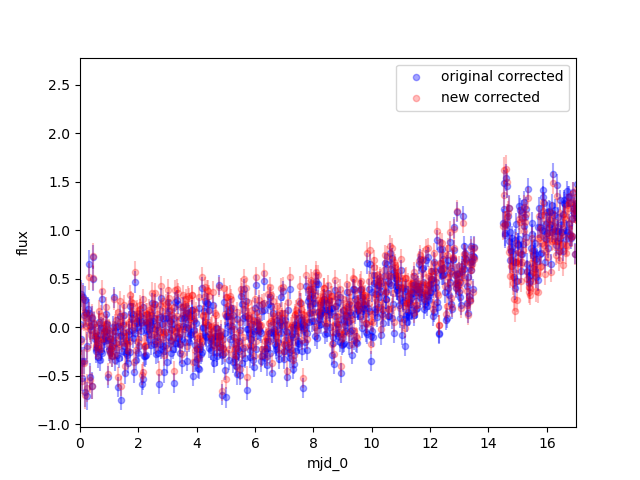

<IPython.core.display.Javascript object>


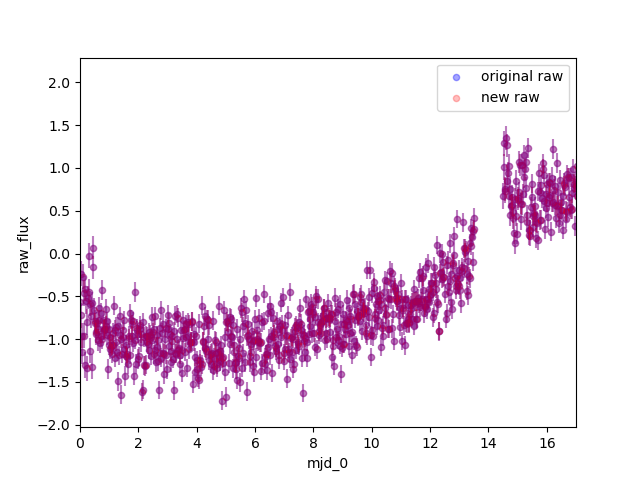

[0.44166848673509274, 0.39174031025044076]
[0.6295832935636453, 0.6295832935636453]

[0.2075724617041843, 0.2687637634237456]
[-0.6145999893655228, -0.6145999893655228]

[0.1267178042627586, 0.22917124066709862]
[-0.7905568370040774, -0.7905568370040774]


<IPython.core.display.Javascript object>


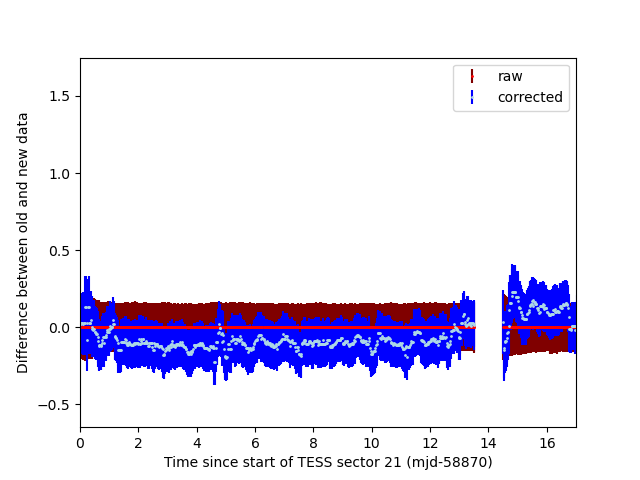

[2407, 2407]


<IPython.core.display.Javascript object>


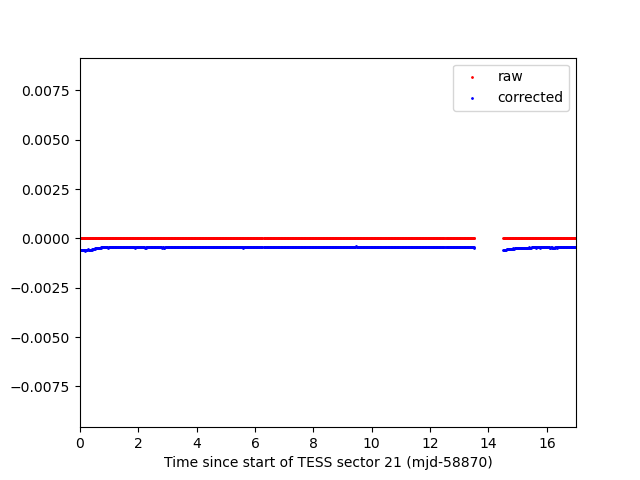

(0.0, 17.0)

In [10]:
ax = tess_2020bpi_norm.plot(x='mjd_0',y='flux',yerr='e_flux',kind='scatter',color='blue',label='original corrected',alpha=0.35)
tess_2020bpi_a_norm.plot(x='mjd_0',y='flux',yerr='e_flux',kind='scatter',color='red',alpha=0.25,label='new corrected',ax=ax)
ax.set_xlim(0,17)

ax1 = tess_2020bpi_norm.plot(x='mjd_0',y='raw_flux',yerr='e_raw_flux',kind='scatter',color='blue',label='original raw',alpha=0.35)
tess_2020bpi_a_norm.plot(x='mjd_0',y='raw_flux',yerr='e_raw_flux',kind='scatter',color='red',alpha=0.25,label='new raw',ax=ax1)
ax1.set_xlim(0,17)
print([tess_2020bpi_norm.query('mjd_0 <16.75').flux.std(),tess_2020bpi_a_norm.query('mjd_0 <16.75').flux.std()])
print([tess_2020bpi_norm.query('mjd_0 <16.75').raw_flux.std(),tess_2020bpi_a_norm.query('mjd_0 <16.75').raw_flux.std()])
print()
print([tess_2020bpi_norm.query('mjd_0 <16.75').flux.mean(),tess_2020bpi_a_norm.query('mjd_0 <16.75').flux.mean()])
print([tess_2020bpi_norm.query('mjd_0 <16.75').raw_flux.mean(),tess_2020bpi_a_norm.query('mjd_0 <16.75').raw_flux.mean()])
print()
print([tess_2020bpi_norm.query('mjd_0 <16.75').flux.median(),tess_2020bpi_a_norm.query('mjd_0 <16.75').flux.median()])
print([tess_2020bpi_norm.query('mjd_0 <16.75').raw_flux.median(),tess_2020bpi_a_norm.query('mjd_0 <16.75').raw_flux.median()])
fig, ax2 = plt.subplots()
ax2.errorbar(x=tess_2020bpi_norm.mjd_0,y=(tess_2020bpi_norm.raw_flux-tess_2020bpi_a_norm.raw_flux),yerr=np.sqrt(tess_2020bpi_norm.e_raw_flux**2 + tess_2020bpi_a_norm.e_raw_flux**2),
             color='red',marker='o',markersize=1,linestyle='none',ecolor='maroon',label='raw')
ax2.errorbar(x=tess_2020bpi_norm.mjd_0,y=(tess_2020bpi_norm.flux-tess_2020bpi_a_norm.flux),yerr=np.sqrt(tess_2020bpi_norm.e_flux**2 + tess_2020bpi_a_norm.e_flux**2),
             color='lightblue',marker='o',markersize=1,linestyle='none',ecolor='blue',label='corrected')
ax2.set_xlabel('Time since start of TESS sector 21 (mjd-58870)')
ax2.set_ylabel('Difference between old and new data')
ax2.legend()
#ax2.scatter(x=tess_2020bpi_norm.mjd_0,y=(tess_2020bpi_norm.raw_flux-tess_2020bpi_a_norm.raw_flux),color='red')
ax2.set_xlim(0,17)
print([len(tess_2020bpi_a_norm.raw_flux),len(tess_2020bpi_a_norm.e_raw_flux**2)])

fig,ax3 = plt.subplots()
ax3.scatter(x=tess_2020bpi_norm.mjd_0,y=(tess_2020bpi_norm.e_raw_flux-tess_2020bpi_a_norm.e_raw_flux),
             color='red',s=1,label='raw')
ax3.scatter(x=tess_2020bpi_norm.mjd_0,y=(tess_2020bpi_norm.e_flux-tess_2020bpi_a_norm.e_flux),
             color='blue',s=1,label='corrected')
ax3.set_xlabel('Time since start of TESS sector 21 (mjd-58870)')
ax3.set_ylabel('Difference between old and new errors')
ax3.legend()
ax3.set_xlim(0,17)

In [12]:
ztf_2020bpi = pd.read_csv('JhaData/ztf_SN2020bpi.csv')
ztf_2020bpi['mjd_0'] = ztf_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
## Note: setting the zero value of mjd_0 to that of TESS for consitency 
ztf_2020bpi['e_flux_tuple'] = ztf_2020bpi['e_flux']
ztf_2020bpi['e_flux'] = [
    np.mean(ast.literal_eval(flux))
    for flux in ztf_2020bpi['e_flux'].to_numpy()
                        ]

ztf_2020bpi.head()

,BTJD,mjd,magap,sig_magap,flux,e_flux,mjd_0,e_flux_tuple
0,1879.870567,58879.370567,19.729799,0.2218,0.014224,0.002926,9.426487,"(0.002628163767600394, 0.003223832161130714)"
1,1881.011065,58880.511065,19.959801,0.2436,0.011509,0.002604,10.566985,"(0.0023129338055085068, 0.0028946976073013723)"
2,1881.031343,58880.531343,19.473101,0.1538,0.018018,0.002561,10.587263,"(0.0023797689104727814, 0.002741920034638759)"
3,1881.843854,58881.343854,19.660400,0.2291,0.015163,0.003223,11.399774,"(0.0028844699689605166, 0.003562099310207071)"
4,1882.032546,58881.532546,19.363001,0.1425,0.019941,0.002625,11.588466,"(0.00245268546717093, 0.0027966740782900297)"


sampling...



done


<IPython.core.display.Javascript object>


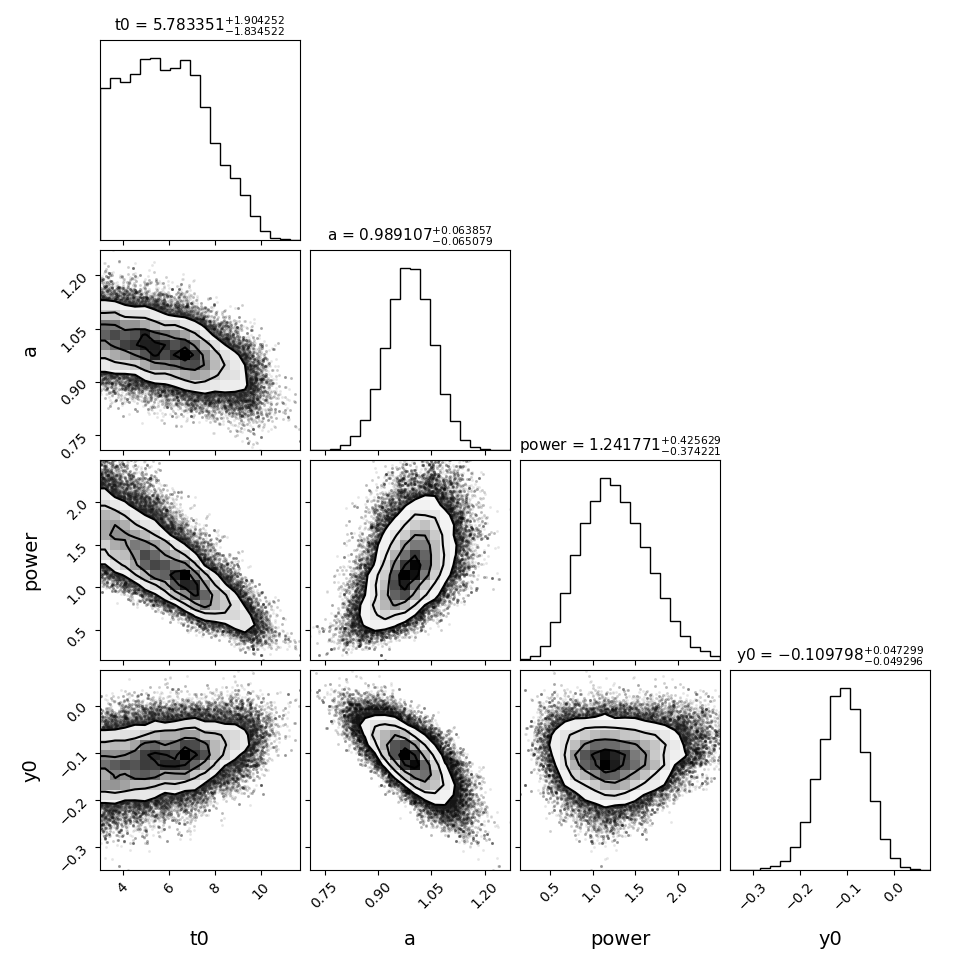

<IPython.core.display.Javascript object>


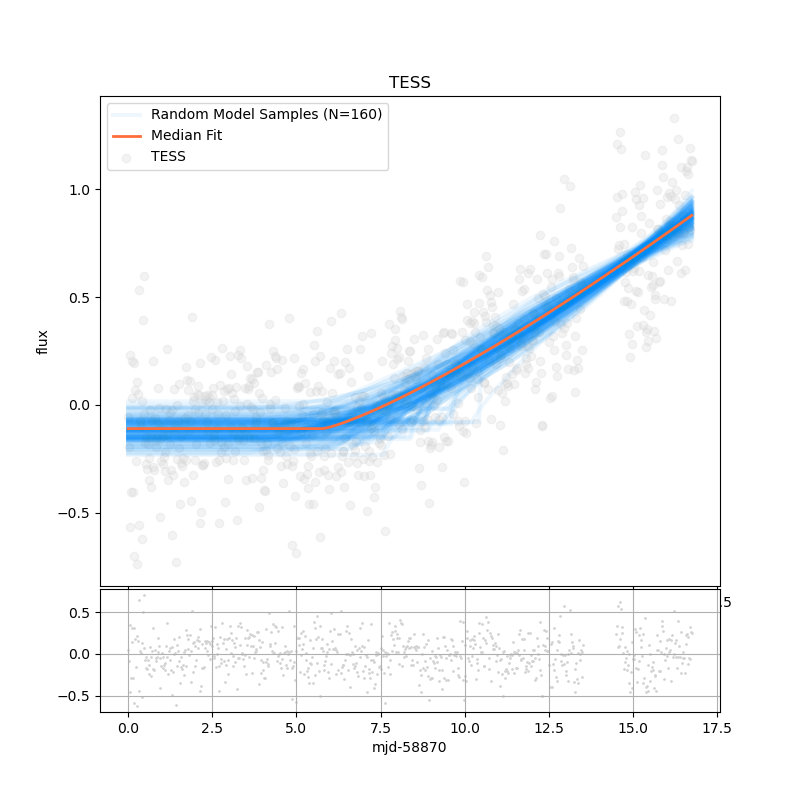

In [17]:
guess = {'t0':5.5, 'a':1,'power':1.8,'y0':-0.1} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05}
fits, randFits = hammerTime(tess_2020bpi_s21_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=40,nburn=1000,nsteps=4000,
                            curveModel='decoupled', 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


<IPython.core.display.Javascript object>


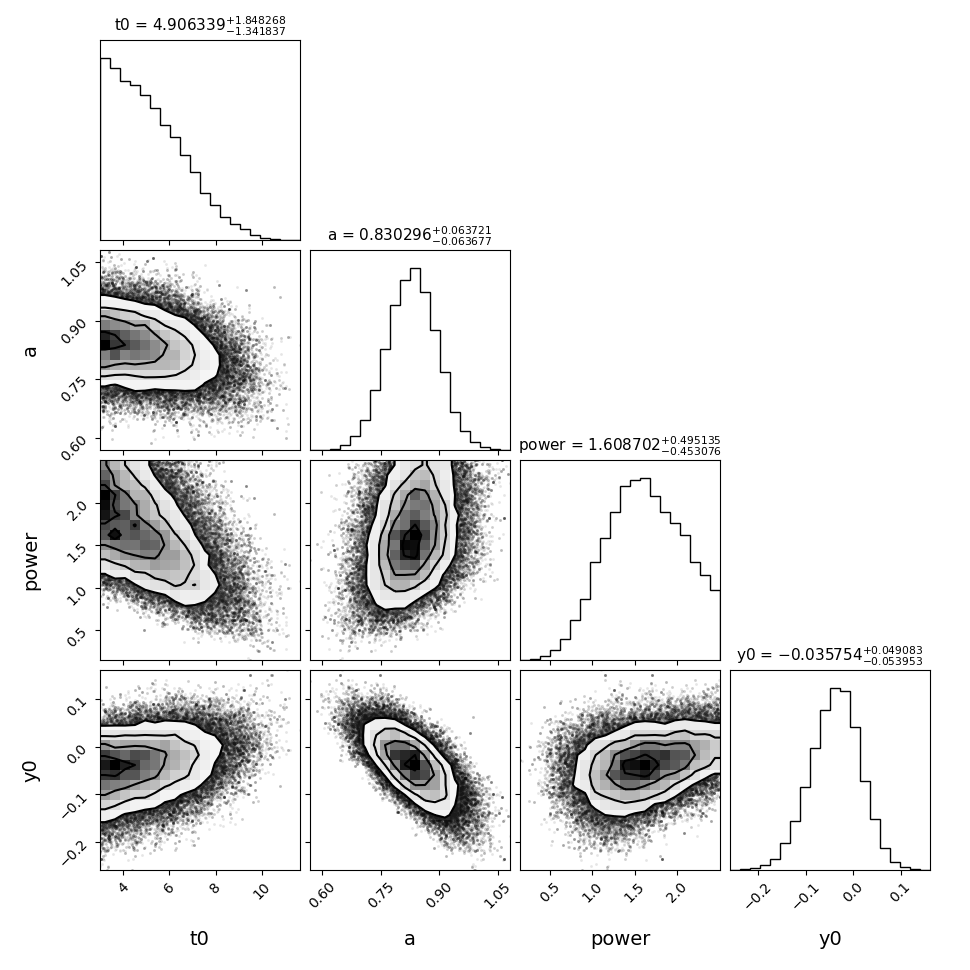

<IPython.core.display.Javascript object>


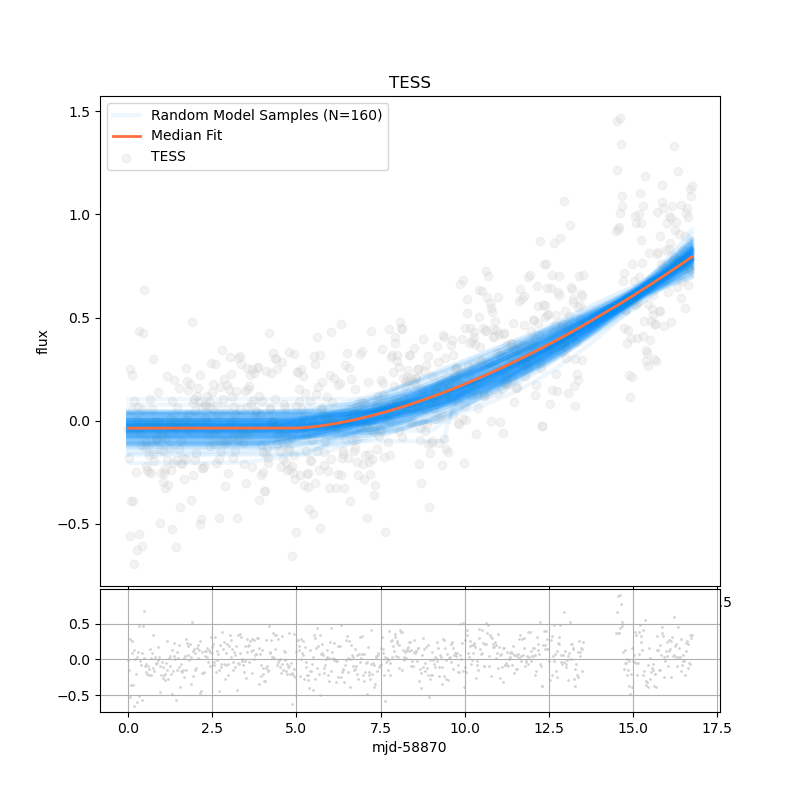

In [18]:
guess = {'t0':5.5, 'a':1,'power':1.8,'y0':-0.1} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05}
fits, randFits = hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=40,nburn=1000,nsteps=4000,
                            curveModel='decoupled', 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


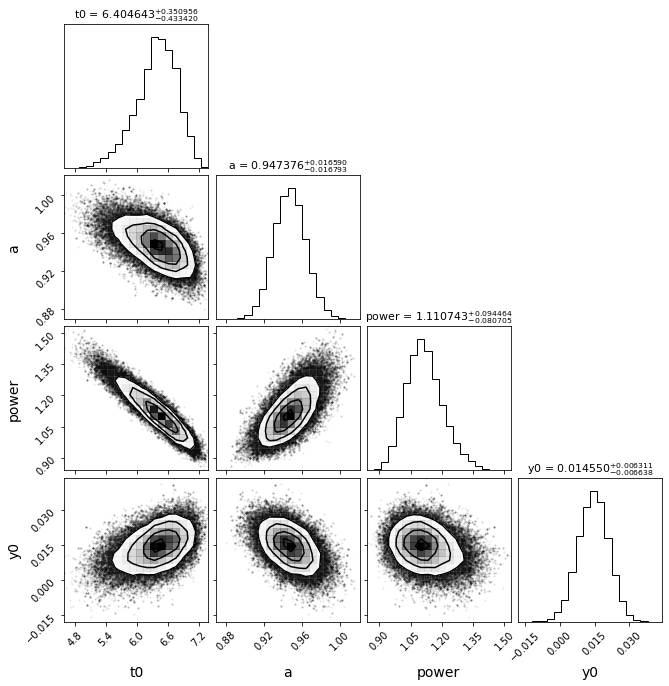

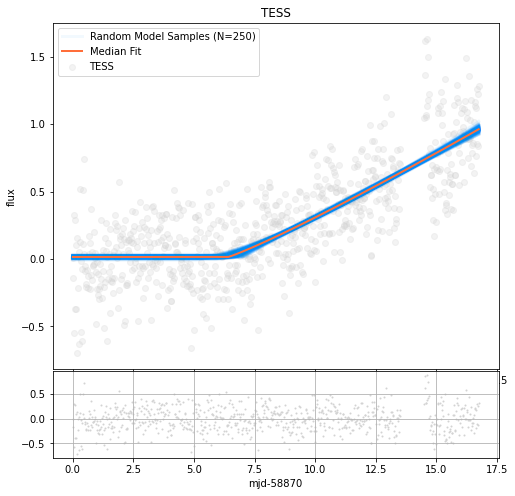

In [22]:
guess = {'t0':5.5, 'a':1,'power':1.8,'y0':-0.1} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05}
fits, randFits = hammerTime(tess_2020bpi_a_norm, guess, scale, 
                            cutoff=16.75, nwalkers=50,nburn=2500,nsteps=5000,
                            curveModel='decoupled', 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


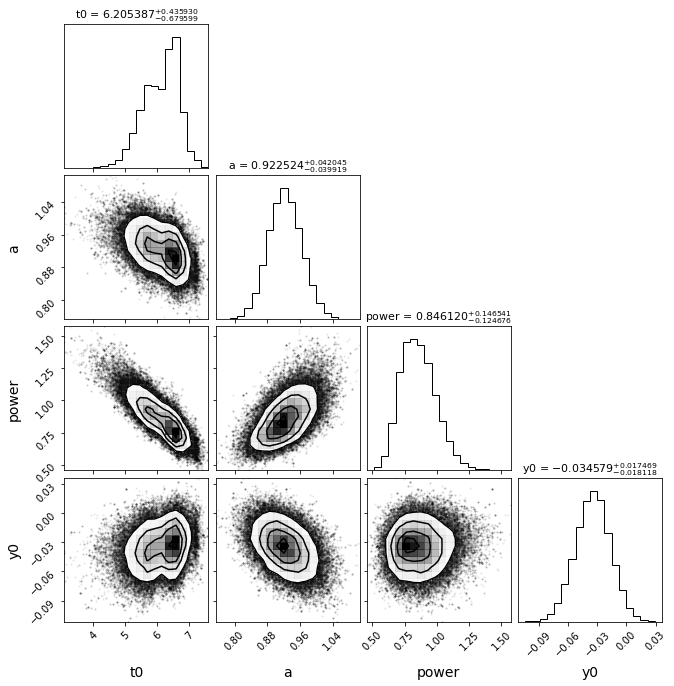

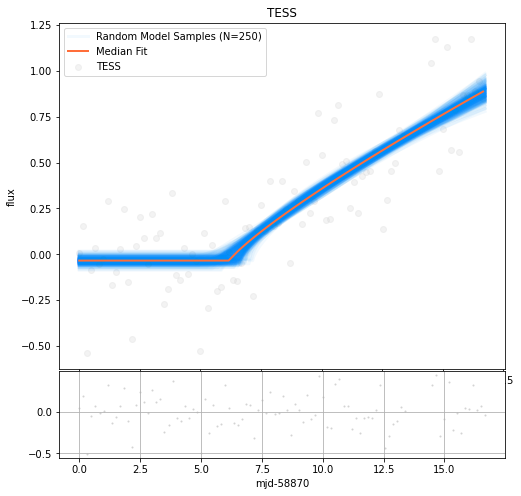

In [21]:
guess = {'t0':5.5, 'a':1,'power':1.8,'y0':-0.1} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05}
fits, randFits = hammerTime(tess_2020bpi_a_norm[::8], guess, scale, 
                            cutoff=16.75, nwalkers=50,nburn=2500,nsteps=5000,
                            curveModel='decoupled', 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


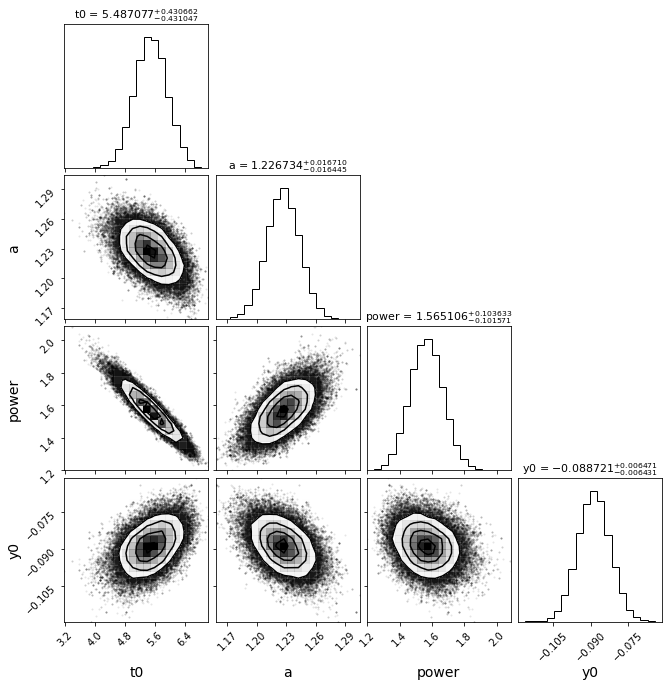

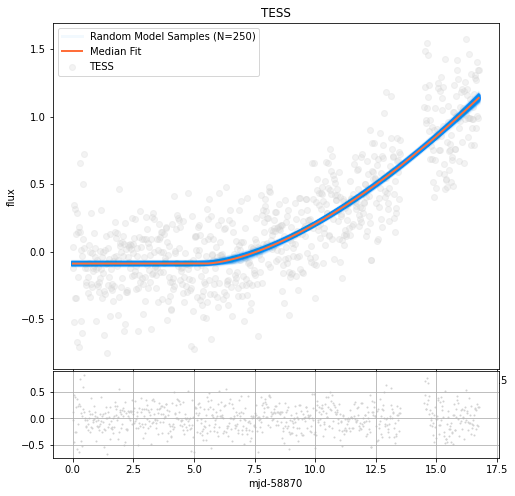

In [23]:
guess = {'t0':5.5, 'a':1,'power':1.8,'y0':-0.1} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05}
fits, randFits = hammerTime(tess_2020bpi_norm, guess, scale, 
                            cutoff=16.75, nwalkers=50,nburn=2500,nsteps=5000,
                            curveModel='decoupled', 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


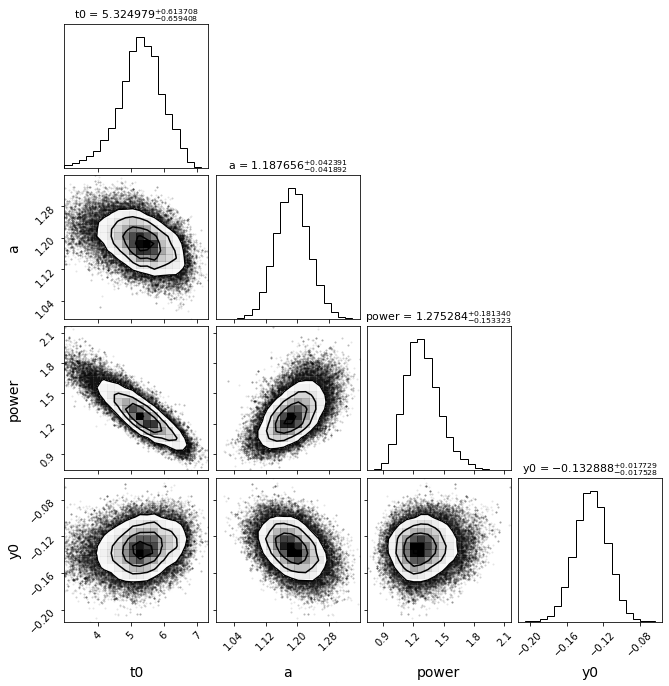

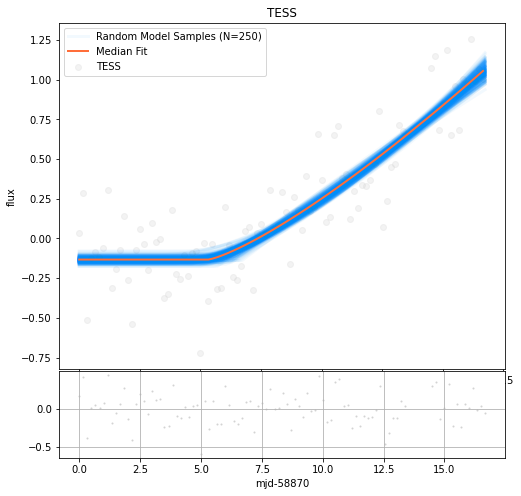

In [24]:
guess = {'t0':5.5, 'a':1,'power':1.8,'y0':-0.1} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05}
fits, randFits = hammerTime(tess_2020bpi_norm[::8], guess, scale, 
                            cutoff=16.75, nwalkers=50,nburn=2500,nsteps=5000,
                            curveModel='decoupled', 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));